# Analysis of Results from wcc_logreg_prereqs_iterate

In [44]:
import numpy as np
import pandas as pd
import pickle
import tqdm.auto as tqdm
from pprint import pprint
import collections
import random
import feather
import matplotlib.pyplot as plt

In [45]:
full = pd.read_csv("../results/nogender_nogpa_x1success_y1success_full.csv")
prereq = pd.read_csv("../results/nogender_nogpa_x1success_y1success_prereq.csv")

In [46]:
full.columns

Index(['Unnamed: 0', 'course_name', 'train_score', 'test_score',
       'train_groundtruth', 'test_groundtruth', 'train_size', 'test_size',
       'precision', 'recall', 'f1_score'],
      dtype='object')

In [47]:
full = full.loc[(full['course_name'].isin(list(prereq['course_name'])))]

In [76]:
def basicPlot(full_data, prereq_data, x, y, average=True):
    ax = full_data.plot.scatter(x=x, y=y, color='DarkBlue', label='full', figsize=(10, 8))
    prereq_data.plot.scatter(x=x, y=y, color='DarkGreen', label='prereq', ax=ax)
    if average:
        ax.axhline(y=np.mean(list(full_data[y])), color='DarkBlue')
        ax.axhline(y=np.mean(list(prereq_data[y])), color='DarkGreen')
    plt.show()

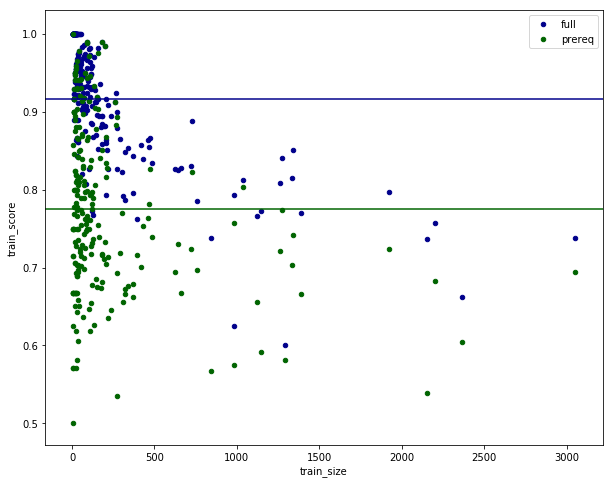

In [77]:
basicPlot(full, prereq, "train_size", "train_score")

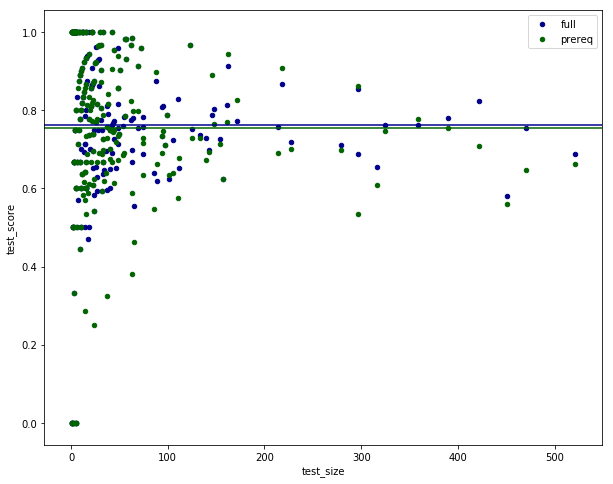

In [78]:
basicPlot(full, prereq, "test_size", "test_score")

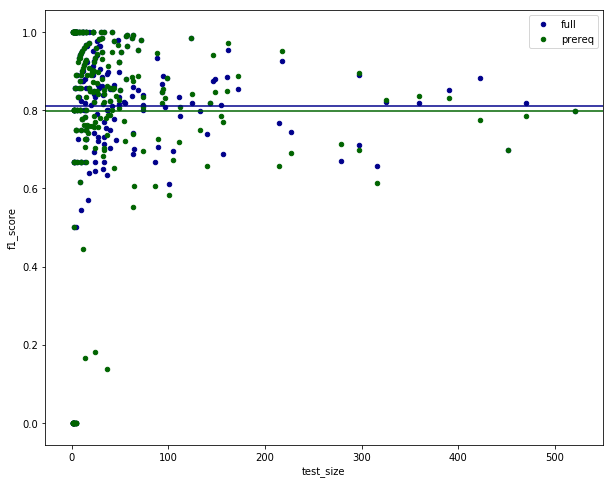

In [79]:
basicPlot(full, prereq, "test_size", "f1_score")

In [64]:
prereq.sort_values('course_name', inplace=True)
prereq = prereq.reset_index(drop=True)

In [65]:
full.sort_values('course_name', inplace=True)
full = full.reset_index(drop=True)

In [71]:
f1_score_prereq = []
test_score_prereq = []
train_score_prereq = []
for i in range(len(full)) : 
    if prereq.loc[i, "f1_score"] > full.loc[i, "f1_score"]:
        f1_score_prereq.append(prereq.loc[i, "course_name"])
    if prereq.loc[i, "train_score"] > full.loc[i, "train_score"]:
        train_score_prereq.append(prereq.loc[i, "course_name"])
    if prereq.loc[i, "test_score"] > full.loc[i, "test_score"]:
        test_score_prereq.append(prereq.loc[i, "course_name"])

In [72]:
f1_score_prereq

['BIO144',
 'BIOE103',
 'BIOE42',
 'CEE101A',
 'CEE182',
 'CHEM183',
 'CHEM185',
 'CHEM31B',
 'CHEMENG120B',
 'CHEMENG174',
 'CME102A',
 'CME108',
 'CS106X',
 'CS107',
 'CS107E',
 'CS110',
 'CS124',
 'CS143',
 'CS144',
 'CS155',
 'CS161',
 'CS166',
 'CS168',
 'CS181',
 'CS221',
 'CS224N',
 'CS227B',
 'CS231N',
 'CS247',
 'CS261',
 'CS276',
 'ECON126',
 'ECON136',
 'ECON52',
 'EE109',
 'EE116',
 'EE253',
 'EE376A',
 'ENGR40M',
 'GEOPHYS110',
 'LINGUIST130A',
 'MATH104',
 'MATH106',
 'MATH107',
 'MATH108',
 'MATH115',
 'MATH121',
 'MATH171',
 'MATH175',
 'ME112',
 'ME113',
 'MS&E146',
 'MS&E211',
 'OSPKYOTO40M',
 'PHIL151',
 'PHYSICS112',
 'PHYSICS113',
 'PHYSICS120',
 'PHYSICS131',
 'PHYSICS171',
 'PHYSICS230',
 'PHYSICS65',
 'PSYCH95',
 'STATS116',
 'STATS200',
 'STATS203',
 'STATS207']

In [74]:
full_subset = full.loc[(full['course_name'].isin(f1_score_prereq))]
prereq_subset = prereq.loc[(full['course_name'].isin(f1_score_prereq))]

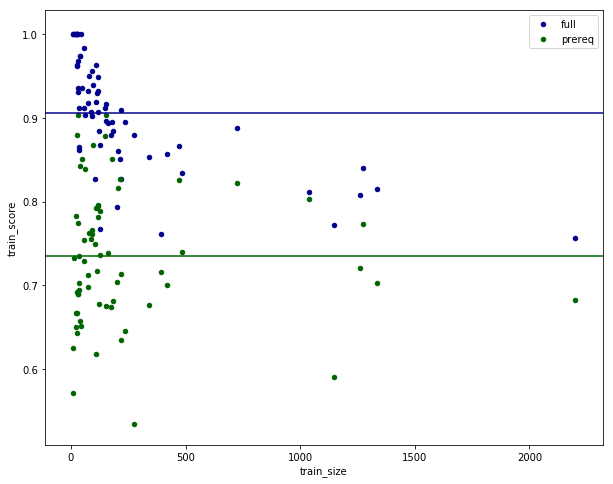

In [80]:
basicPlot(full_subset, prereq_subset, "train_size", "train_score")

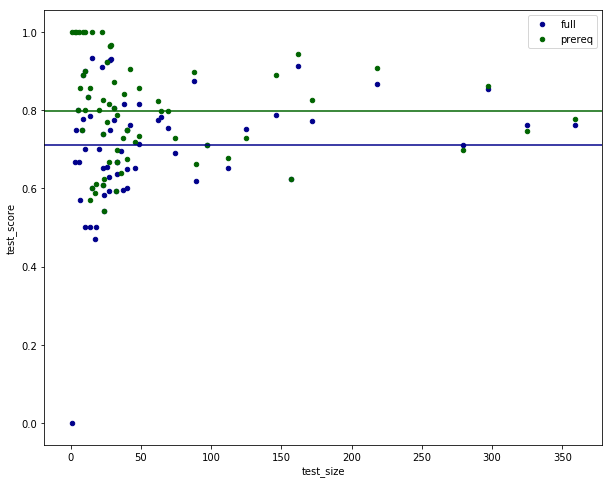

In [81]:
basicPlot(full_subset, prereq_subset, "test_size", "test_score")

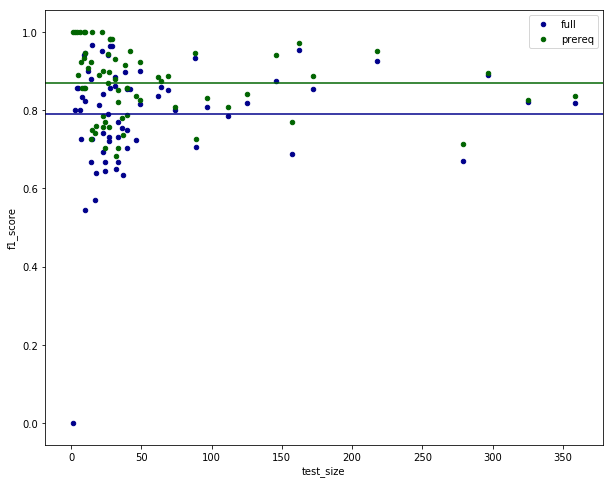

In [82]:
basicPlot(full_subset, prereq_subset, "test_size", "f1_score")